<a href="https://colab.research.google.com/github/Gabytez/retina-blood-vessel-segmentation/blob/main/DL_Retina_Blood_Vessel_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preparation
## Dataset Gathering
First of all, we need to upload the kaggle API json file which will be used to download the datasets from kaggle.

In [ ]:
from google.colab import files

uploaded_file = files.upload()

for fileName in uploaded_file.keys():
  print('Succesfully uploaded file "{name}" with the size of {length} bytes'.format(
      name=fileName, length=len(uploaded_file[fileName])))

# create a directory .kaggle and then move kaggle.json into the folder where the API expects to find it, then set the permissions
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
Succesfully uploaded file "kaggle.json" with the size of 69 bytes


Next we need to download the dataset from kaggle, this datatset will be downloaded as a zip file.

In [ ]:
!pip install kaggle # ensure that the latest kaggle CLI is installed

!kaggle datasets download -d abdallahwagih/retina-blood-vessel

Dataset URL: https://www.kaggle.com/datasets/jocelyndumlao/rose-leaf-diseases-symptoms-id-and-control-guide
License(s): CC0-1.0
 98% 4.06G/4.14G [00:03<00:00, 1.08GB/s]
100% 4.14G/4.14G [00:03<00:00, 1.22GB/s]


Import necessary libraries which will be needed

In [ ]:
!pip install tensorflow
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 17.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
import os
# import glob
from tqdm.notebook import tqdm_notebook as tqdm # library for progress bar
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D, BatchNormalization, Flatten

!pip install albumentations # Install Albumentations

import albumentations as A
import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.4/369.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.8/307.8 kB 26.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

Unzip the dataset which is downloaded as a zip file.

In [ ]:
from zipfile import ZipFile
file_name = "/content/retina-blood-vessel.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# Image Processing

# Training
## Training Preparation
Utilizing VGG16 Pre-Trained Model, loads the pre-trained weights from the model, but removes the classification layers and also freezes the convolutional base.

In [ ]:
from keras.applications import vgg16

# Set image dimensions
img_rows, img_cols = 224, 224

vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Freeze all layers, as layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Print the current layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


We create a function which will create the head of the pre-trained model, adding the layers which will be used to adapt the pre-trained model to the task of detecting brain tumor.

In [ ]:
def create_classification_head(bottom_model, num_classes):
    # creates the top or head of the model that will be placed on top of the bottom layers

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

From the create_classification_head function, we can use the VGG16 model as the bottom model and then have the number of classes be 2 (because we are trying to prerdict whether an image has a tumor or not), this will create the classification head. With the classification head, we combine the input layers from VGG16 with the outputs from the classification head to create the model.

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

num_classes = 4 # the number of classes is 2 because of the output is tumor and no tumor

classification_head = create_classification_head(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = classification_head)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 16,816,452 (64.15 MB)

 Trainable params: 2,101,764 (8.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Backup/checkpoint weights

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint_dir = './training_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

In [ ]:
checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_prefix,
        save_weights_only=True,  # Save only weights, not the whole model architecture
        save_freq='epoch'        # Save after every epoch
        # You can also use save_freq='batch' to save more frequently
        # monitor='val_categorical_accuracy', # Optional: monitor a metric
        # save_best_only=True      # Optional: save only the best model weights based on monitor
    )

In [ ]:
# alternative loading: .keras file
keras_file_path = '/content/rose_leaf_disease_classification_model_vgg_epoch8.keras'

try:
    # Load weights from the .keras file
    model.load_weights(keras_file_path)
    print(f"Successfully loaded weights from {keras_file_path}")

except Exception as e:
    print(f"Error loading weights: {e}")

Successfully loaded weights from /content/rose_leaf_disease_classification_model_vgg_epoch8.keras


In [ ]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest_checkpoint)
print(f"Loaded weights from: {latest_checkpoint}")

In [ ]:
# Example parsing (adjust based on your checkpoint file naming)
import re
match = re.search(r'ckpt_(\d+)', latest_checkpoint)
if match:
    initial_epoch_to_resume = int(match.group(1))
else:
    initial_epoch_to_resume = 0 # Default to 0 if parsing fails
print(f"Resuming training from epoch: {initial_epoch_to_resume}")

Next, we compile the model to prepare it for the training, with the metrics Accuracy, Precision, Sensitivity (Recall), and F1-Score. We also include the values for True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

In [ ]:
from keras.metrics import TrueNegatives, FalsePositives, TruePositives, FalseNegatives, Precision, Recall, categorical_accuracy, F1Score # Import necessary metrics
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [categorical_accuracy, Precision(), Recall(), F1Score(),
                                                                                TrueNegatives(), FalsePositives(),
                                                                                TruePositives(), FalseNegatives()])

## Training Process
Then we finally initiate the training process.

## Saving the Model
Save the model into a .keras file for reuse.

In [ ]:
os.chdir('/content')
# model.save('rose_leaf_disease_classification_model', save_format='tf') # save with SavedModel format
model.save('rose_leaf_disease_classification_model_vgg_epoch10.keras') # save with .keras format

or save the weights only

In [ ]:
# Assuming 'model' is your trained Keras model
weights_save_path = '/content/rose_leaf_classification_weights.weights.h5'

# Save only the model's weights
model.save_weights(weights_save_path)

print(f"Model weights saved to: {weights_save_path}")

Model weights saved to: /content/rose_leaf_classification_weights.weights.h5


# Training Results
Plot the training and validation results.

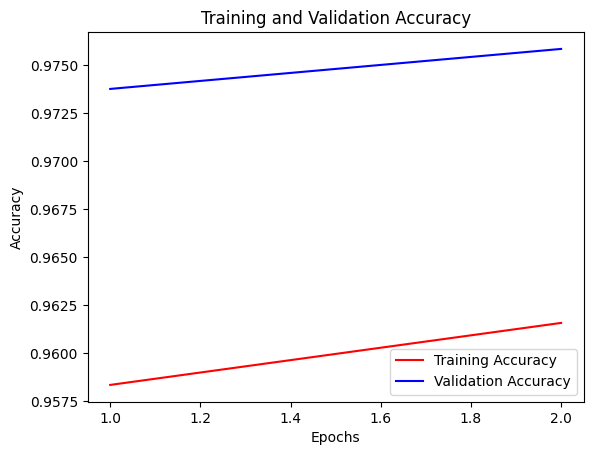

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = train_history.history['categorical_accuracy']
val_acc = train_history.history['val_categorical_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc=0)
plt.figure()

plt.show()

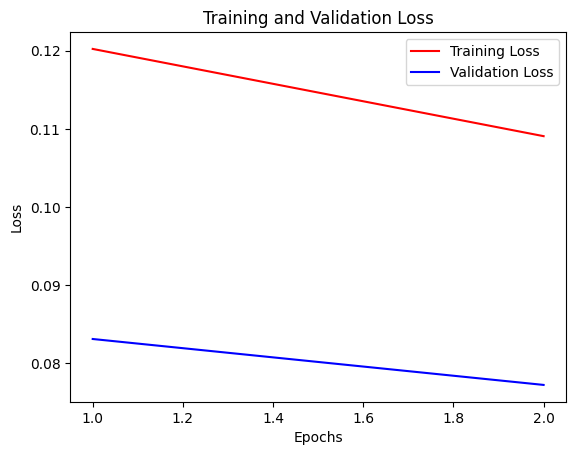

In [ ]:
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

75/75 ━━━━━━━━━━━━━━━━━━━━ 508s 7s/step


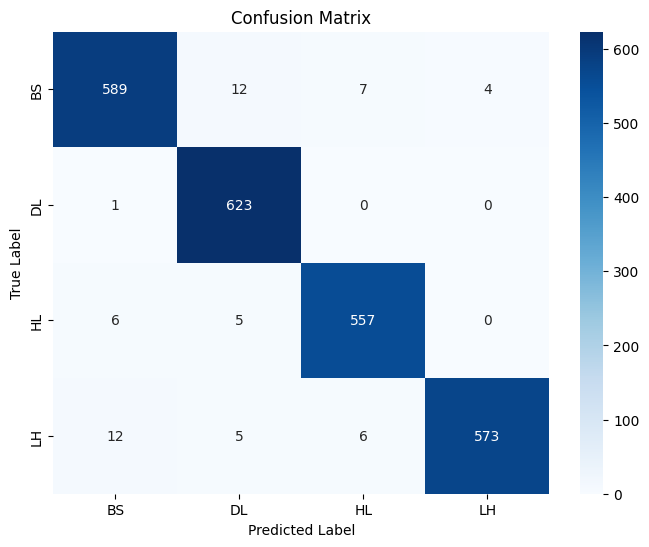

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming we have y_test (true labels) and predictions from the model

# 1. Get predictions:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# 2. Create confusion matrix:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# 3. Plot confusion matrix using Seaborn heatmap:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Prediction

In [ ]:
import tensorflow as tf
# from tensorflow import keras
# from keras import models

from google.colab import files
import cv2
import numpy as np
import io

In [ ]:
predict_model = tf.keras.models.load_model('/content/brain_tumor_detection_model.keras')

upload_folder = '/content/predict_data'

os.makedirs(upload_folder, exist_ok=True)
os.chdir(upload_folder)

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

# Thresholding, Contouring, and Cropping
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Thresholding, much like creating the "mask" for the contouring, with automatic thresholding using Otsu's method
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # finds contours

if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    x_coord, y_coord, w, h = cv2.boundingRect(largest_contour)
    cropped_img = img[y_coord:y_coord+h, x_coord:x_coord+w] # Crop the image using the bounding rectangle
    img = cropped_img

img = cv2.resize(img, (224, 224))
img = img / 255.0
img = img.reshape(1, 224, 224, 3)

prediction = predict_model.predict(img)
predicted_class = np.argmax(prediction)

if predicted_class == 0:
  print("The model predicts: No Tumor")
else:
  print("The model predicts: Tumor")

Saving pituitary1.jpg to pituitary1.jpg


1/1 [==============================] - 0s 203ms/step
The model predicts: Tumor
